In [1]:
from SFXGBoost.Model import SFXGBoost, devide_D_Train
from SFXGBoost.config import Config, MyLogger
from SFXGBoost.dataset.datasetRetrieval import getDataBase
from flwr.common import (
    Code,
    EvaluateIns,
    EvaluateRes,
    FitIns,
    FitRes,
    GetParametersIns,
    GetParametersRes,
    Parameters,
    Status,
)

In [2]:
dataset = 'healthcare'
NUM_CLIENTS = 2
DATA_DEVISION = [1/NUM_CLIENTS] * NUM_CLIENTS

logger = MyLogger(Config(experimentName = "experiment 1",
                        nameTest= "test",
                        model="centralised",
                        dataset="healthcare",
                        lam=0.1, # 0.1 10
                        gamma=0.5,
                        alpha=0.0,
                        learning_rate=0.3,
                        max_depth=8,
                        max_tree=20,
                        nBuckets=100,
                        save=False)).logger


config = Config(experimentName = "experiment 1",
        nameTest= dataset + " test",
        model="normal",
        dataset=dataset,
        lam=0, # 0.1 10
        gamma=0, # 0.5
        alpha=0.0,
        learning_rate=0.3,
        max_depth=8,
        max_tree=5,
        nBuckets=100,
        save=False,
        data_devision=DATA_DEVISION,
        train_size=10_000,
        client=0,
        num_client=NUM_CLIENTS
        )

In [3]:
configs:list[Config] = []
for i in range(config.num_client+1):
    configs.append(Config(experimentName = "experiment 1",
        nameTest= config.nameTest,
        model=config.model,
        dataset=dataset,
        lam=config.lam , # 0.1 10
        gamma=config.gamma, # 0.5
        alpha=config.alpha,
        learning_rate=config.learning_rate,
        max_depth=config.max_depth,
        max_tree=config.max_tree,
        nBuckets=config.nBuckets,
        save=False,
        data_devision=config.data_devision,
        train_size=config.train_size,
        client=i,
        num_client=config.num_client
        ))                
POSSIBLE_PATHS = ["e:\\oneDrive\\UOB\\Federated_XGBoost_Python-main\\data\\"]
X_train, y_train, X_test, y_test, fName, X_shadow, y_shadow = getDataBase(config.dataset, POSSIBLE_PATHS, False, config.train_size)()


start DB = 0, end = 5000, myrank = 1
start DB = 5000, end = 10000, myrank = 2
Tree 0:
Depth 0:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 1:


e:\OneDrive\UOB\xgboost-comprehensive\FederBoost\SFXGBoost\common\XGBoostcommon.py:17: RuntimeWarning: invalid value encountered in scalar divide
  L = lambda G,H, GL, GR, HL, HR, lamb, alpha, gamma: ((ThresholdL1(GL*GL, alpha) / (HL + lamb)) + (ThresholdL1(GR*GR, alpha) / (HR + lamb)) - (ThresholdL1(G*G, alpha) / (H + lamb))) - gamma


Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 2:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 3:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 4:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 5:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 6:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 7:
Client1 sending G,H
Client2 sending G,H
loss on train = 2.351827327069376
loss on test = 2.3918276800126015
Server sending splits.
Tree 1:
Depth 0:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 1:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 2:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 3:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 4:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 5:
Client1 sending G,H
Client2 sending G,H
Server sending split

e:\venv\UOB-FL\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Server sending splits.


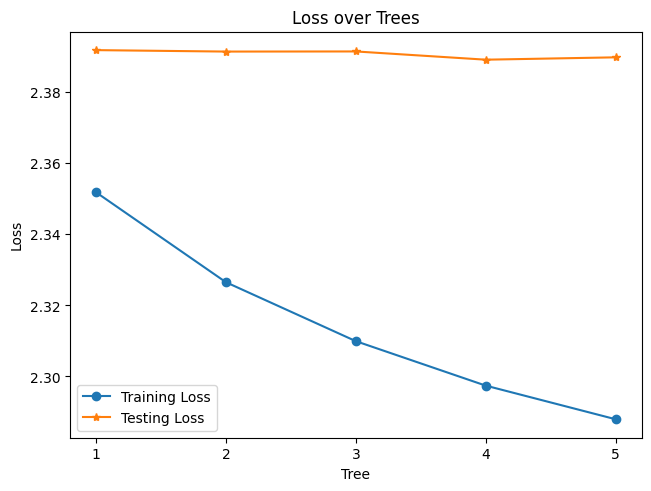

In [4]:
# split data
total_users = config.num_client # participants
total_lenght = len(X_train)
elements_per_node = total_lenght//total_users
start_end = [(i * elements_per_node, (i+1)* elements_per_node) for i in range(total_users)]

# X_train_list = []
# y_train_list = []

# for rank in range(total_users):
#     rank += 1
#     X_train_my, y_train_my = devide_D_Train(X_train, y_train, rank, config.data_devision)
#     X_train_list.append(X_train_my)
#     y_train_list.append(y_train_my)



bst = SFXGBoost(configs[0], logger) # server model
bst.fit(X_train, y_train, fName, X_test, y_test)

bst_clients:list[SFXGBoost] = []

for i in range(total_users):

    bst_client = SFXGBoost(configs[i+1], logger)
    bst_client.fit(X_train, y_train, fName, X_test, y_test, bst.splits)
    bst_clients.append(bst_client)

# a = FitRes(Status(Code.OK, "OK"), Parameters([bst], ""), 0, {})



# training

for t in range(config.max_tree):
    print(f"Tree {t}:")
    for d in range(config.max_depth):
        print(f"Depth {d}:")
        GHs = []
        for i in range(total_users):
            GH = bst_clients[i].participant_boost(t, d)
            GHs.append(GH)
        update_info = bst.server_boost(GHs, t, d)
        for i in range(total_users):
            bst_clients[i].participant_update(update_info, t, d)
    

# print(bst)



### More trees

In [5]:
dataset = 'healthcare'
NUM_CLIENTS = 2
DATA_DEVISION = [1/NUM_CLIENTS] * NUM_CLIENTS

logger = MyLogger(Config(experimentName = "experiment 1",
                        nameTest= "test",
                        model="centralised",
                        dataset="healthcare",
                        lam=0.1, # 0.1 10
                        gamma=0.5,
                        alpha=0.0,
                        learning_rate=0.3,
                        max_depth=8,
                        max_tree=20,
                        nBuckets=100,
                        save=False)).logger


config = Config(experimentName = "experiment 1",
        nameTest= dataset + " test",
        model="normal",
        dataset=dataset,
        lam=0, # 0.1 10
        gamma=0, # 0.5
        alpha=0.0,
        learning_rate=0.3,
        max_depth=8,
        max_tree=20,
        nBuckets=100,
        save=False,
        data_devision=DATA_DEVISION,
        train_size=10_000,
        client=0,
        num_client=NUM_CLIENTS
        )

In [6]:
configs:list[Config] = []
for i in range(config.num_client+1):
    configs.append(Config(experimentName = "experiment 1",
        nameTest= config.nameTest,
        model=config.model,
        dataset=dataset,
        lam=config.lam , # 0.1 10
        gamma=config.gamma, # 0.5
        alpha=config.alpha,
        learning_rate=config.learning_rate,
        max_depth=config.max_depth,
        max_tree=config.max_tree,
        nBuckets=config.nBuckets,
        save=False,
        data_devision=config.data_devision,
        train_size=config.train_size,
        client=i,
        num_client=config.num_client
        ))                
POSSIBLE_PATHS = ["e:\\oneDrive\\UOB\\Federated_XGBoost_Python-main\\data\\"]
X_train, y_train, X_test, y_test, fName, X_shadow, y_shadow = getDataBase(config.dataset, POSSIBLE_PATHS, False, config.train_size)()


start DB = 0, end = 5000, myrank = 1
start DB = 5000, end = 10000, myrank = 2
Tree 0:
Depth 0:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 1:


e:\OneDrive\UOB\xgboost-comprehensive\FederBoost\SFXGBoost\common\XGBoostcommon.py:17: RuntimeWarning: invalid value encountered in scalar divide
  L = lambda G,H, GL, GR, HL, HR, lamb, alpha, gamma: ((ThresholdL1(GL*GL, alpha) / (HL + lamb)) + (ThresholdL1(GR*GR, alpha) / (HR + lamb)) - (ThresholdL1(G*G, alpha) / (H + lamb))) - gamma


Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 2:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 3:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 4:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 5:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 6:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 7:
Client1 sending G,H
Client2 sending G,H
loss on train = 2.351827327069376
loss on test = 2.3918276800126015
Server sending splits.
Tree 1:
Depth 0:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 1:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 2:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 3:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 4:
Client1 sending G,H
Client2 sending G,H
Server sending splits.
Depth 5:
Client1 sending G,H
Client2 sending G,H
Server sending split

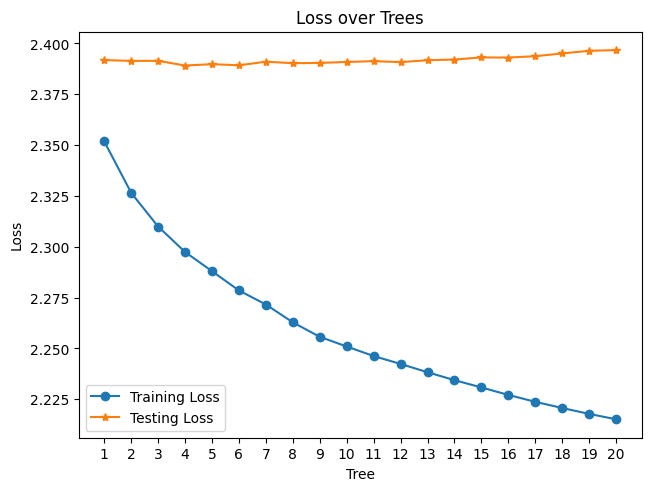

In [7]:
# split data
total_users = config.num_client # participants
total_lenght = len(X_train)
elements_per_node = total_lenght//total_users
start_end = [(i * elements_per_node, (i+1)* elements_per_node) for i in range(total_users)]

# X_train_list = []
# y_train_list = []

# for rank in range(total_users):
#     rank += 1
#     X_train_my, y_train_my = devide_D_Train(X_train, y_train, rank, config.data_devision)
#     X_train_list.append(X_train_my)
#     y_train_list.append(y_train_my)



bst = SFXGBoost(configs[0], logger) # server model
bst.fit(X_train, y_train, fName, X_test, y_test)

bst_clients:list[SFXGBoost] = []

for i in range(total_users):

    bst_client = SFXGBoost(configs[i+1], logger)
    bst_client.fit(X_train, y_train, fName, X_test, y_test, bst.splits)
    bst_clients.append(bst_client)

# a = FitRes(Status(Code.OK, "OK"), Parameters([bst], ""), 0, {})



# training

for t in range(config.max_tree):
    print(f"Tree {t}:")
    for d in range(config.max_depth):
        print(f"Depth {d}:")
        GHs = []
        for i in range(total_users):
            GH = bst_clients[i].participant_boost(t, d)
            GHs.append(GH)
        update_info = bst.server_boost(GHs, t, d)
        for i in range(total_users):
            bst_clients[i].participant_update(update_info, t, d)
    

# print(bst)

